In [1]:
import tensorflow as tf
import os
cwd = os.getcwd()
os.chdir('../../src/')
from dataloader import OneHotEncoder, load_fasta_data, RNASeqDataGenerator
os.chdir('../experiments/CNNPredictivePower/')

In [2]:
be_type='CBE'
sample='161F'
be_class='A3A'

data_dir = "../../data/raw/{0}/{0}-sequence/".format(be_type)
test_chr = [str(x) for x in range(20, 23)] +['X']
test_seqs, test_ers = [], []
for rep in test_chr:
        seq, er = load_fasta_data(sample, rep, data_dir)
        test_seqs = seq+test_seqs
        test_ers = er+test_ers

In [3]:
testgen = RNASeqDataGenerator(test_seqs, test_ers, logits=False)
model = tf.keras.models.load_model('../../models/CNN/{}/{}.h5'.format(be_type, sample))
preds = model.predict(testgen)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
import numpy as np
preds = np.squeeze(preds, axis=1)

In [5]:
from tqdm import tqdm
import numpy as np
true_edit = np.array([])
for seq, er in tqdm(testgen):
    true_edit = np.hstack([true_edit, er])

100%|██████████| 2727/2727 [00:05<00:00, 456.16it/s]


In [6]:
true_edit.shape

(174528,)

In [7]:
preds+=np.exp(-8)
true_edit+=np.exp(-8)

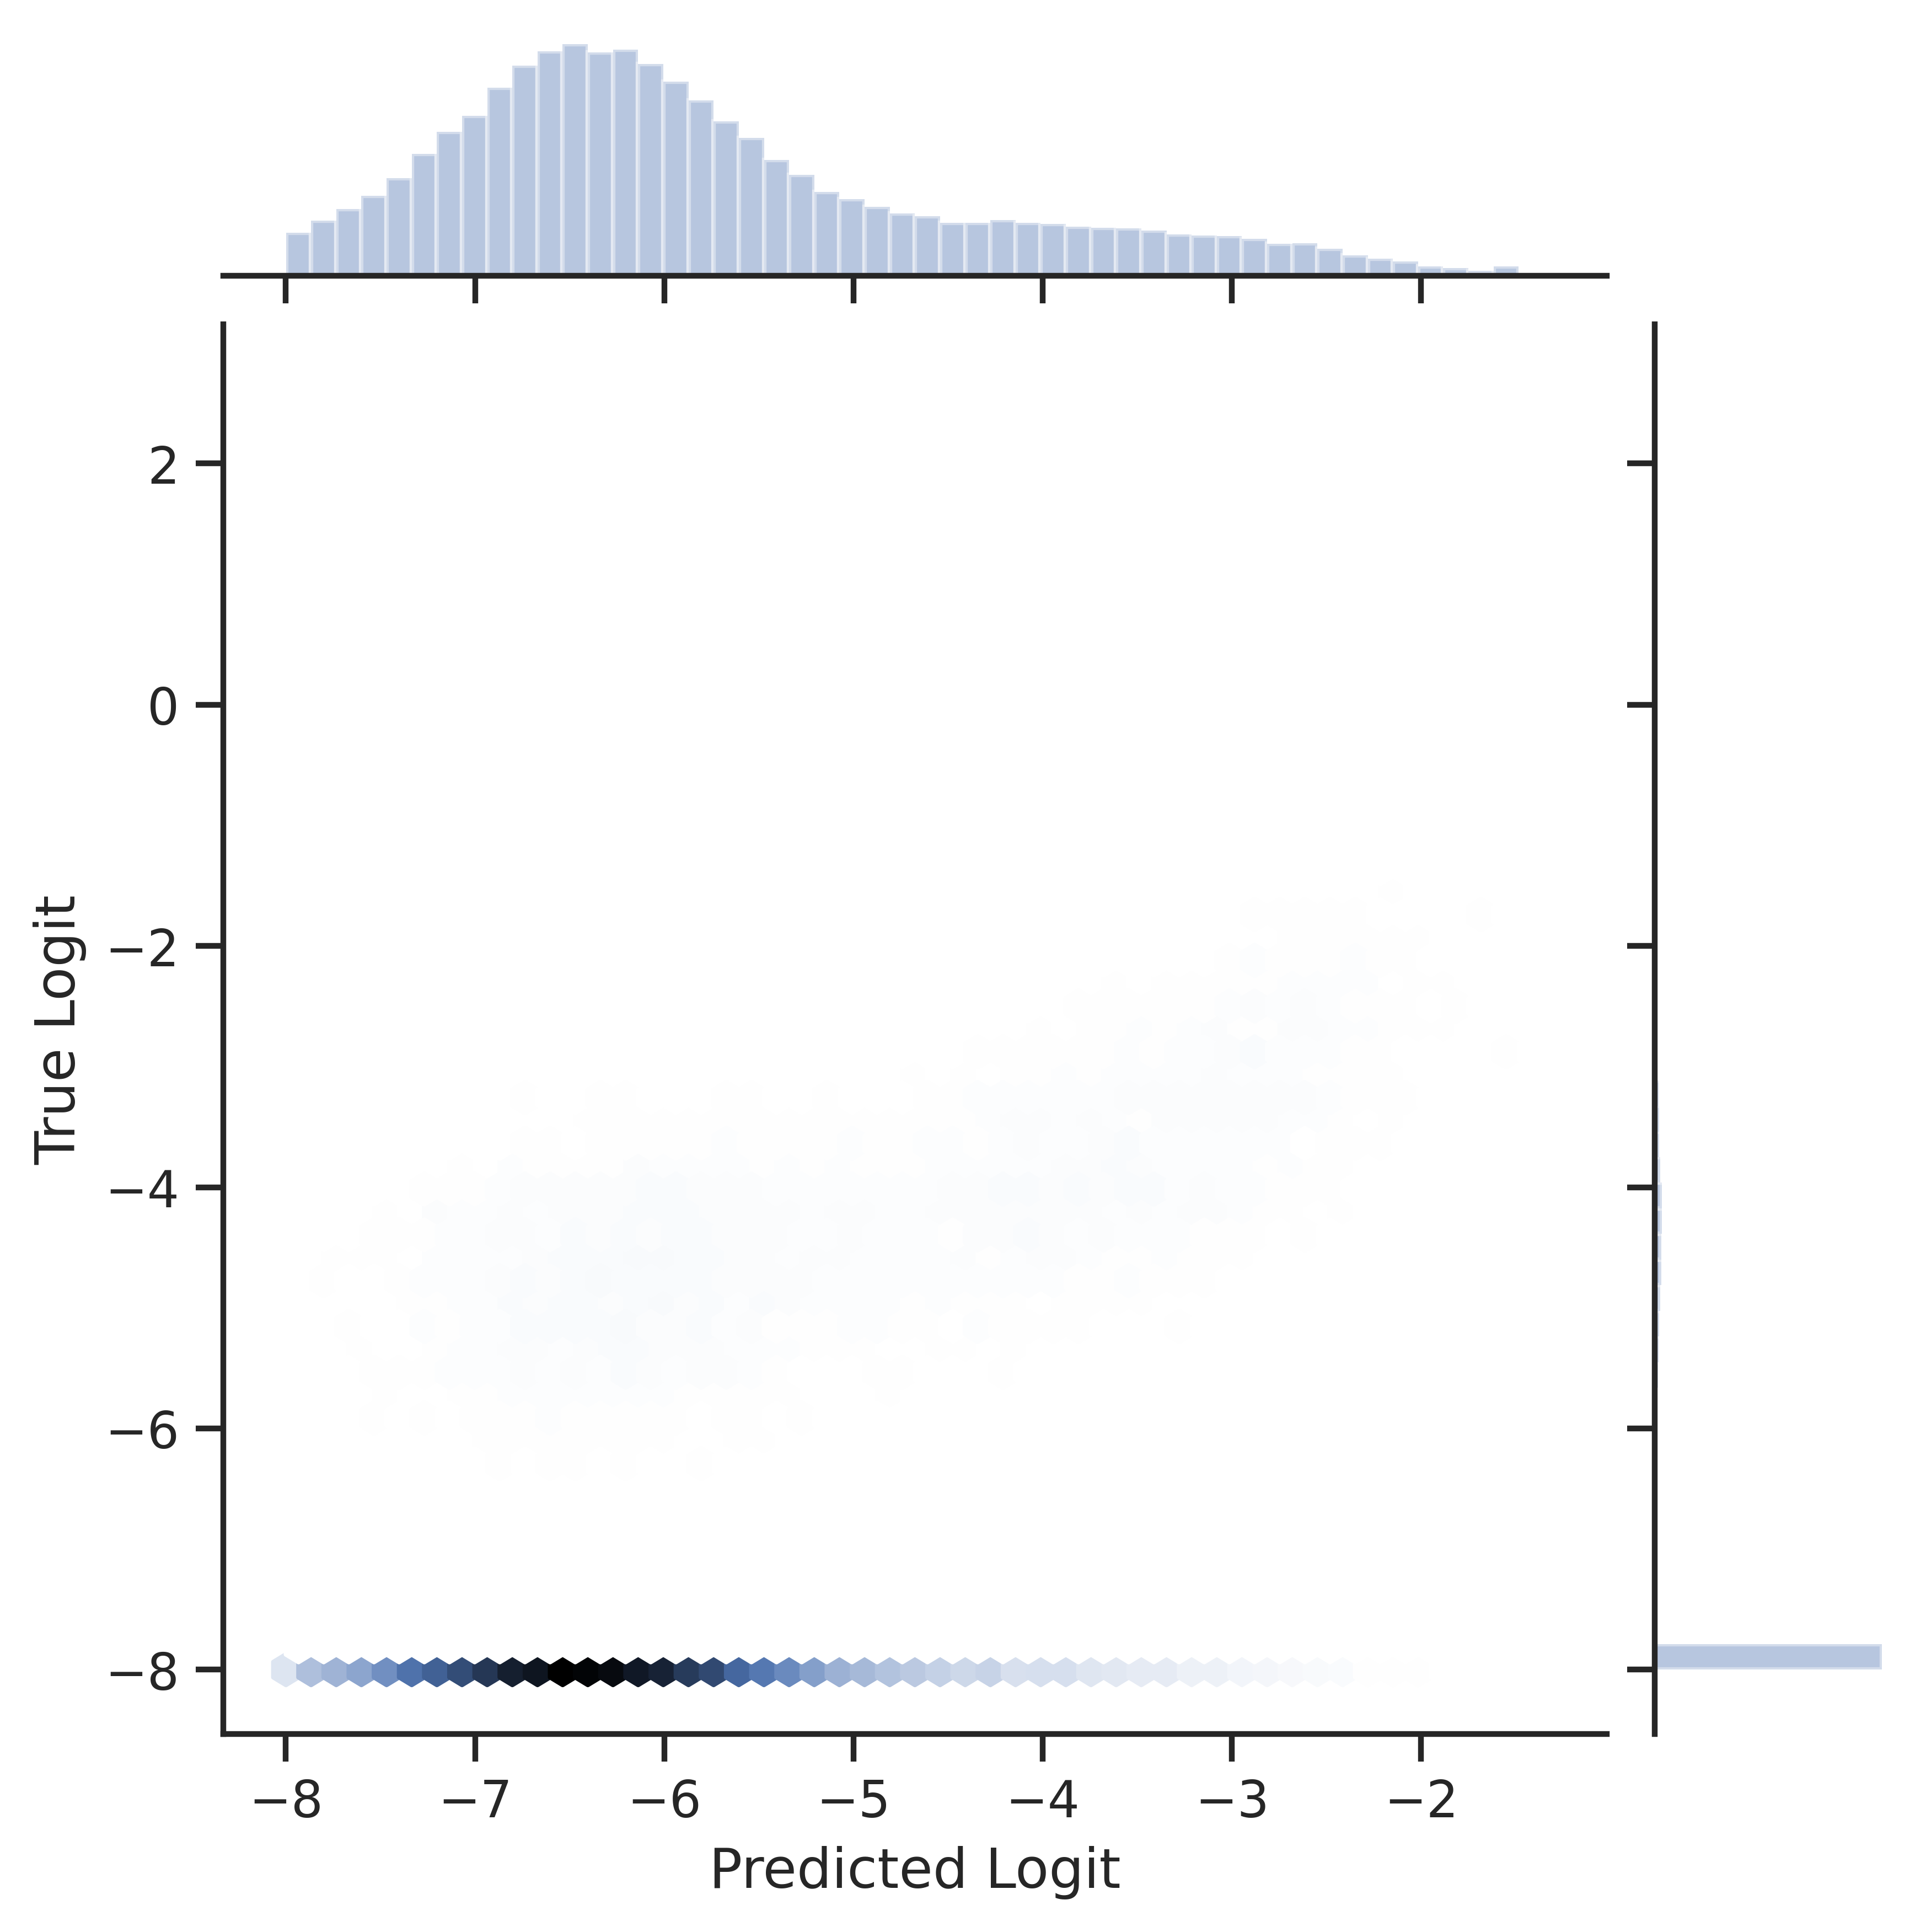

In [8]:
from scipy.special import logit, expit
import seaborn as sns
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_context('notebook')
sns.set_style("ticks")

import pandas as pd
df = pd.DataFrame(data={'Predicted Logit':logit(preds[0:50000]), 'True Logit': logit(true_edit[0:50000])})

sns.jointplot(data=df, x="Predicted Logit", y="True Logit", kind="hex")

In [9]:
df = pd.DataFrame(data={'Predicted Logit':logit(preds[0:50000]), 'True Logit': logit(true_edit[0:50000])})

In [10]:
df2 = df[df['True Logit'] > -7.9]  

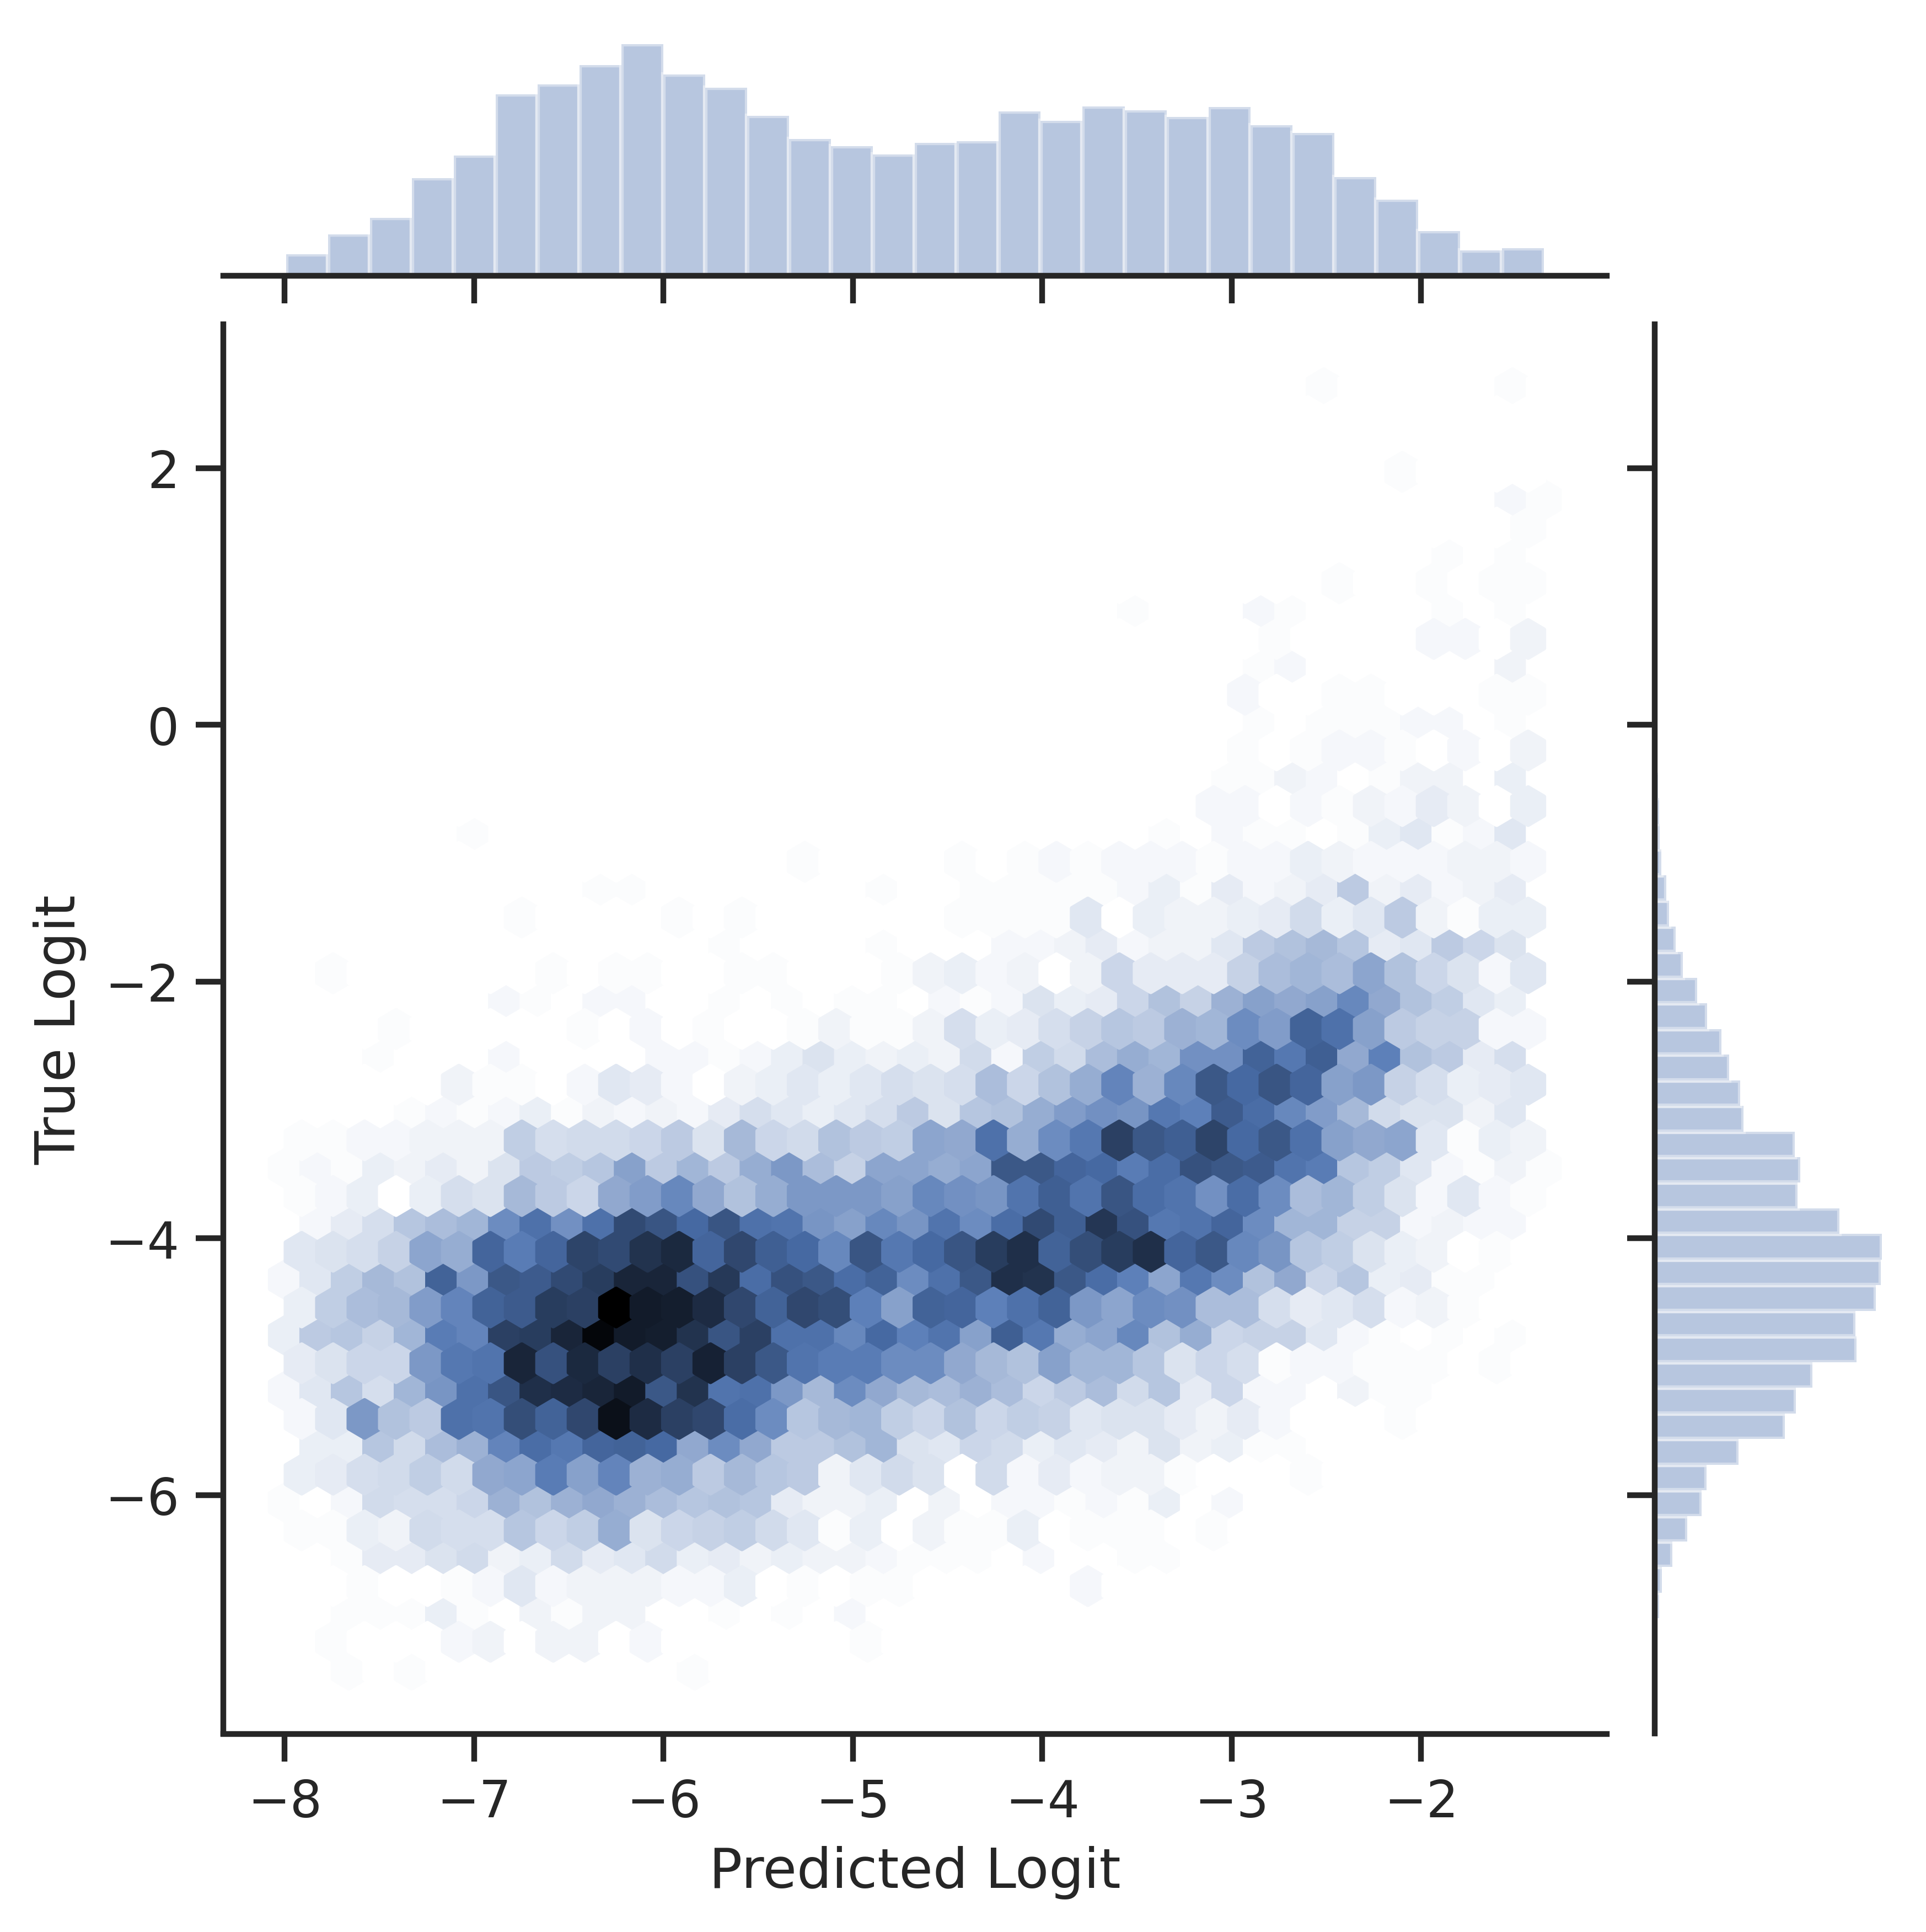

In [11]:
plt = sns.jointplot(data=df2, x="Predicted Logit", y="True Logit", kind="hex")
plt.savefig('{}/{}Logit.svg'.format(be_class, sample))
plt.savefig('{}/{}Logit.png'.format(be_class, sample))

In [12]:
from scipy import stats
stats.pearsonr(preds, true_edit)

(0.5844757941378751, 0.0)